<a href="https://colab.research.google.com/github/FatmaHamed22/signal-project/blob/main/signal_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***LOADING AND IMPORTING DATA ***

In [ ]:
!wget -O wesad_dataset.zip "https://uni-siegen.sciebo.de/s/HGdUkoNlW1Ub0Gx/download"

--2025-05-09 13:03:41--  https://uni-siegen.sciebo.de/s/HGdUkoNlW1Ub0Gx/download
Resolving uni-siegen.sciebo.de (uni-siegen.sciebo.de)... 128.176.1.2
Connecting to uni-siegen.sciebo.de (uni-siegen.sciebo.de)|128.176.1.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2249444501 (2.1G) [application/zip]
Saving to: ‘wesad_dataset.zip’

wesad_dataset.zip   100%[===================>]   2.09G  31.7MB/s    in 69s     

2025-05-09 13:04:52 (30.9 MB/s) - ‘wesad_dataset.zip’ saved [2249444501/2249444501]



In [ ]:
!unzip wesad_dataset.zip -d wesad_data

Archive:  wesad_dataset.zip
   creating: wesad_data/WESAD/
   creating: wesad_data/WESAD/S10/
  inflating: wesad_data/WESAD/S10/S10.pkl  
  inflating: wesad_data/WESAD/S10/S10_E4_Data.zip  
  inflating: wesad_data/WESAD/S10/S10_quest.csv  
  inflating: wesad_data/WESAD/S10/S10_readme.txt  
  inflating: wesad_data/WESAD/S10/S10_respiban.txt  
   creating: wesad_data/WESAD/S11/
  inflating: wesad_data/WESAD/S11/S11.pkl  
  inflating: wesad_data/WESAD/S11/S11_E4_Data.zip  
  inflating: wesad_data/WESAD/S11/S11_quest.csv  
  inflating: wesad_data/WESAD/S11/S11_readme.txt  
  inflating: wesad_data/WESAD/S11/S11_respiban.txt  
   creating: wesad_data/WESAD/S13/
  inflating: wesad_data/WESAD/S13/S13.pkl  
  inflating: wesad_data/WESAD/S13/S13_E4_Data.zip  
  inflating: wesad_data/WESAD/S13/S13_quest.csv  
  inflating: wesad_data/WESAD/S13/S13_readme.txt  
  inflating: wesad_data/WESAD/S13/S13_respiban.txt  
   creating: wesad_data/WESAD/S14/
  inflating: wesad_data/WESAD/S14/S14.pkl  
  infla

***LIBRARIES ***

In [ ]:
from scipy.signal import welch
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_validate, cross_val_predict
from sklearn.metrics import classification_report, make_scorer, f1_score, balanced_accuracy_score, confusion_matrix, accuracy_score, precision_score, recall_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, train_test_split

In [ ]:
!pip install peakutils
!pip install imbalanced-learn
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 12.7 MB/s eta 0:00:00


***DATA ORGANSATION***

In [ ]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

source_dir = "wesad_data/WESAD"
destination_dir = "wesad_pkl_files"

os.makedirs(destination_dir, exist_ok=True)


for root, dirs, files in os.walk(source_dir):
    for file in files:
        if file.endswith(".pkl"):
            full_path = os.path.join(root, file)
            shutil.copy(full_path, destination_dir)


pkl_files = [os.path.join(destination_dir, f) for f in os.listdir(destination_dir) if f.endswith('.pkl')]
data_dict = {}

for file in pkl_files:
    person_data = pd.read_pickle(file)
    ecg_signal = person_data["signal"]["chest"]["ECG"].flatten()
    label = person_data["label"]
    person_name = file.replace(".pkl", "")
    data_dict[f"{person_name} ECG"] = ecg_signal
    data_dict[f"{person_name} Label"] = label

df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data_dict.items()]))
df

,wesad_pkl_files/S17 ECG,wesad_pkl_files/S17 Label,wesad_pkl_files/S11 ECG,wesad_pkl_files/S11 Label,wesad_pkl_files/S13 ECG,wesad_pkl_files/S13 Label,wesad_pkl_files/S10 ECG,wesad_pkl_files/S10 Label,wesad_pkl_files/S15 ECG,wesad_pkl_files/S15 Label,...,wesad_pkl_files/S9 ECG,wesad_pkl_files/S9 Label,wesad_pkl_files/S8 ECG,wesad_pkl_files/S8 Label,wesad_pkl_files/S4 ECG,wesad_pkl_files/S4 Label,wesad_pkl_files/S2 ECG,wesad_pkl_files/S2 Label,wesad_pkl_files/S14 ECG,wesad_pkl_files/S14 Label
0,1.431793,0.0,0.020096,0.0,-0.272781,0.0,-1.333694,0.0,-0.025543,0.0,...,-0.050583,0.0,0.169510,0.0,-1.405380,0.0,0.021423,0.0,-0.170883,0.0
1,1.461960,0.0,0.036850,0.0,-0.271042,0.0,-1.327744,0.0,-0.012955,0.0,...,-0.056808,0.0,0.166397,0.0,-1.399658,0.0,0.020325,0.0,-0.152618,0.0
2,1.471619,0.0,0.053650,0.0,-0.263947,0.0,-1.322067,0.0,0.002518,0.0,...,-0.047653,0.0,0.163376,0.0,-1.393387,0.0,0.016525,0.0,-0.131973,0.0
3,1.472763,0.0,0.052780,0.0,-0.255386,0.0,-1.316345,0.0,0.008011,0.0,...,-0.039047,0.0,0.153259,0.0,-1.387436,0.0,0.016708,0.0,-0.118790,0.0
4,1.469421,0.0,0.035751,0.0,-0.261520,0.0,-1.310257,0.0,0.007141,0.0,...,-0.040329,0.0,0.147629,0.0,-1.381165,0.0,0.011673,0.0,-0.111740,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4949695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4949696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4949697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4949698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***PRE_PROCESSING ***

***1.FILLTRATION***

In [ ]:
import neurokit2 as nk
import numpy as np

def process_ecg_neurokit(ecg_signal, sampling_rate=700):

    ecg_signals, info = nk.ecg_process(ecg_signal, sampling_rate=sampling_rate)


    filtered_signal = ecg_signals["ECG_Clean"]

    return filtered_signal

In [ ]:
filtered_signals = []
filtered_labels = []

for key in data_dict:
    if key.endswith("ECG"):  # نشتغل على إشارات ECG فقط
        signal = data_dict[key]
        label_key = key.replace("ECG", "Label")

        if label_key in data_dict:
            labels = data_dict[label_key]

            # فلترة الإشارة
            filtered = process_ecg_neurokit(signal)

            # التأكد إن الطولين متساويين أو قريبين جدًا
            min_len = min(len(filtered), len(labels))
            filtered = filtered[:min_len]
            labels = labels[:min_len]

            # فك الإشارات وإضافة كل نقطة على حدة
            filtered_signals.extend(filtered)
            filtered_labels.extend(labels)
        else:
            print(f"Warning: No matching label for {key}")


In [ ]:
print("Length of filtered_signal:", len(filtered_signals))
print("Length of label_signal:", len(filtered_labels))

Length of filtered_signal: 60807600
Length of label_signal: 60807600


***binary transformation ***

In [ ]:
filtered_signals = np.array(filtered_signals)
filtered_labels = np.array(filtered_labels)


filtered_indices = [i for i, label in enumerate(filtered_labels) if label in [0, 1, 2, 3, 4]]


filtered_signals = filtered_signals[filtered_indices]
filtered_labels = filtered_labels[filtered_indices]


binary_labels = np.array([0 if label == 2 else 1 for label in filtered_labels])

***2-data segmention*** *

In [ ]:
import numpy as np

def segment_biosignal_with_labels(filtered_signals, binary_labels,
                                  window_sizes=[60, 120, 210, 300, 390],
                                  overlaps=[10, 20, 30, 60, 120, 210, 300, 390],
                                  fs=700):
    segmented_data = []
    segment_labels = []


    num_samples = len(filtered_signals)
    binary_labels_resampled = np.interp(np.linspace(0, len(binary_labels) - 1, num_samples),
                                        np.arange(len(binary_labels)), binary_labels)
    binary_labels_resampled = np.round(binary_labels_resampled).astype(int)



    for window in window_sizes:
        for overlap in overlaps:
            if window > overlap:
                step = window - overlap
                for i in range(0, len(filtered_signals) - window * fs+1, step * fs):

                    segment = filtered_signals[i:i + window * fs]
                    segment_label_window = binary_labels_resampled[i:i + window * fs]


                    if len(segment) == len(segment_label_window):

                        label = int(np.round(np.mean(segment_label_window)))


                        if len(segmented_data) > 0 and len(segment) != len(segmented_data[0]):
                            continue
                        segmented_data.append(segment)
                        segment_labels.append(label)
                    else:
                        print(f"تحذير: طول الـ segment لا يتطابق مع الـ label في النافذة من {i} إلى {i + window * fs}")


    segmented_data = np.array(segmented_data)
    segment_labels = np.array(segment_labels)

    return segmented_data, segment_labels

***feature extraction ***

In [ ]:
def extract_features_from_segments(segments):
    features = []
    for segment in segments:
        f, psd = welch(segment)
        features.append(psd)
    return np.array(features)

***normalization***

In [ ]:
def normalize_features_zscore_safe(train_features, test_features):
    mean = np.mean(train_features, axis=0)
    std = np.std(train_features, axis=0)
    std[std == 0] = 1


    train_norm = (train_features - mean) / std
    test_norm = (test_features - mean) / std

    return train_norm, test_norm


***model***

In [ ]:
results = []
all_models_info = []

window_sizes = [60, 120, 210, 300, 390]
overlaps = [10, 20, 30, 60, 120, 210, 300, 390]

for window in window_sizes:
    for overlap in overlaps:
        if window > overlap:
            print(f"\n🧪 Testing Window={window}s, Overlap={overlap}s")
            segments, y_segments = segment_biosignal_with_labels(
                filtered_signals, binary_labels,
                window_sizes=[window],
                overlaps=[overlap],
                fs=700
            )

            if len(np.unique(y_segments)) < 2:
                print("⛔️ Skipping due to only one class present.")
                continue

            features = extract_features_from_segments(segments)

            # Split
            X_train, X_test, y_train, y_test = train_test_split(
                features, y_segments, test_size=0.2, random_state=42, stratify=y_segments
            )

            # Feature selection
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            rf.fit(X_train, y_train)
            sfm = SelectFromModel(rf, threshold="mean", max_features=10)
            sfm.fit(X_train, y_train)

            X_train_selected = sfm.transform(X_train)
            X_test_selected = sfm.transform(X_test)

            # Normalize
            X_train_norm, X_test_norm = normalize_features_zscore_safe(X_train_selected, X_test_selected)

            # Resample using SMOTE before fitting the pipeline
            smote = SMOTE(random_state=42)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train_norm, y_train)

            # Model
            base_model = DecisionTreeClassifier(random_state=42)
            bagging_model = BaggingClassifier(base_model, n_estimators=50, random_state=42)

            pipeline = Pipeline([
                ('scaler', StandardScaler()),
                ('bagging', bagging_model)
            ])

            # Fit and predict
            pipeline.fit(X_train_resampled, y_train_resampled)
            y_pred = pipeline.predict(X_test_norm)

            # Save model info for other plots
            all_models_info.append({
                'window': window,
                'overlap': overlap,
                'X_train': X_train_norm,
                'y_train': y_train,
                'X_test': X_test_norm,
                'y_test': y_test,
                'pipeline': pipeline,
                'y_pred': y_pred
            })

            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')
            bal_acc = balanced_accuracy_score(y_test, y_pred)

            results.append({
                'window': window,
                'overlap': overlap,
                'accuracy': acc,
                'f1_macro': f1,
                'balanced_accuracy': bal_acc
            })



🧪 Testing Window=60s, Overlap=10s

🧪 Testing Window=60s, Overlap=20s

🧪 Testing Window=60s, Overlap=30s

🧪 Testing Window=120s, Overlap=10s

🧪 Testing Window=120s, Overlap=20s

🧪 Testing Window=120s, Overlap=30s

🧪 Testing Window=120s, Overlap=60s

🧪 Testing Window=210s, Overlap=10s

🧪 Testing Window=210s, Overlap=20s

🧪 Testing Window=210s, Overlap=30s

🧪 Testing Window=210s, Overlap=60s

🧪 Testing Window=210s, Overlap=120s

🧪 Testing Window=300s, Overlap=10s

🧪 Testing Window=300s, Overlap=20s

🧪 Testing Window=300s, Overlap=30s

🧪 Testing Window=300s, Overlap=60s

🧪 Testing Window=300s, Overlap=120s

🧪 Testing Window=300s, Overlap=210s

🧪 Testing Window=390s, Overlap=10s

🧪 Testing Window=390s, Overlap=20s

🧪 Testing Window=390s, Overlap=30s

🧪 Testing Window=390s, Overlap=60s

🧪 Testing Window=390s, Overlap=120s

🧪 Testing Window=390s, Overlap=210s

🧪 Testing Window=390s, Overlap=300s


In [ ]:
best_row = results_df.loc[results_df['f1_macro'].idxmax()]
print("\n🏆 Best Combination:")
print(best_row)


print("\n📋 All Results:")
print(results_df.sort_values(by='f1_macro', ascending=False))


🏆 Best Combination:
window               60.000000
overlap              30.000000
accuracy              0.964476
f1_macro              0.919415
balanced_accuracy     0.947031
Name: 2, dtype: float64

📋 All Results:
    window  overlap  accuracy  f1_macro  balanced_accuracy
2       60       30  0.964476  0.919415           0.947031
0       60       10  0.955621  0.896991           0.909899
17     300      210  0.952128  0.894402           0.933461
24     390      300  0.946524  0.871212           0.871212
9      210       30  0.946809  0.865982           0.851588
1       60       20  0.938534  0.857480           0.869893
6      120       60  0.932624  0.857116           0.898245
5      120       30  0.930851  0.852549           0.901698
11     210      120  0.936170  0.845564           0.845564
4      120       20  0.934911  0.833079           0.811577
13     300       20  0.901639  0.804487           0.882275
3      120       10  0.909091  0.789864           0.820094
22     390      1

***confusion matrix***

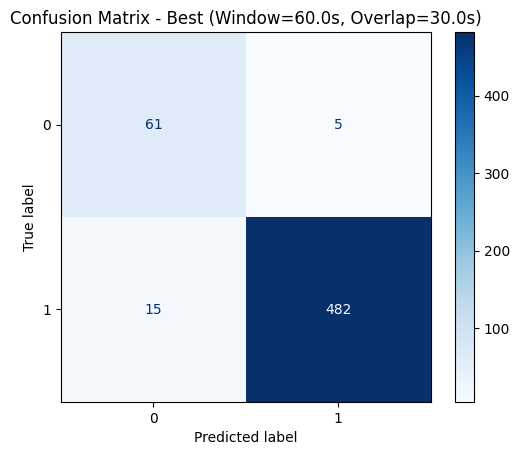

In [ ]:
results_df = pd.DataFrame(results)
best_row = results_df.loc[results_df['accuracy'].idxmax()]
best_window = best_row['window']
best_overlap = best_row['overlap']


for info in all_models_info:
    if info['window'] == best_window and info['overlap'] == best_overlap:
        y_test = info['y_test']
        y_pred = info['y_pred']
        break


cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot(cmap='Blues')
plt.title(f'Confusion Matrix - Best (Window={best_window}s, Overlap={best_overlap}s)')
plt.show()


***LEARNING CURVE ***

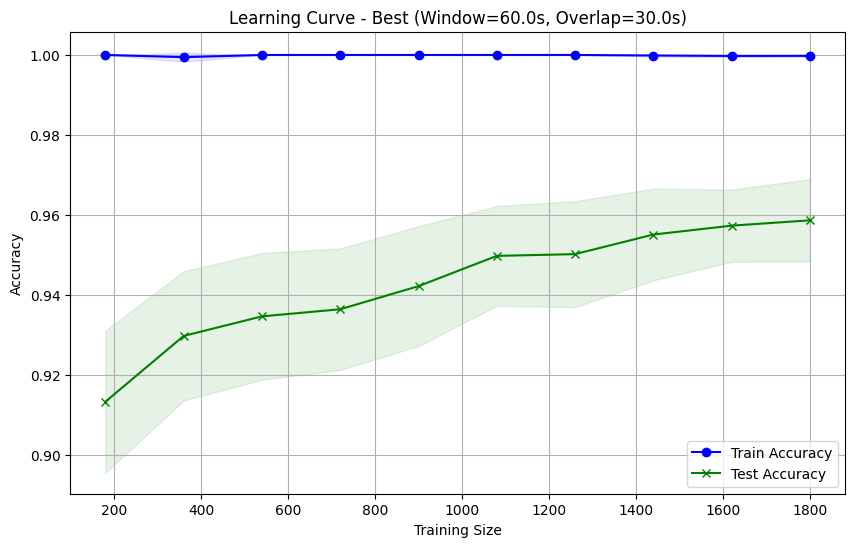

In [ ]:

for info in all_models_info:
    if info['window'] == best_window and info['overlap'] == best_overlap:
        X_train = info['X_train']
        y_train = info['y_train']
        pipeline = info['pipeline']
        break


train_sizes, train_scores, test_scores = learning_curve(
    pipeline, X_train, y_train, cv=5, scoring='accuracy',
    n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Train Accuracy', color='blue', marker='o')
plt.plot(train_sizes, test_mean, label='Test Accuracy', color='green', marker='x')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title(f'Learning Curve - Best (Window={best_window}s, Overlap={best_overlap}s)')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()
